# 문제 정의

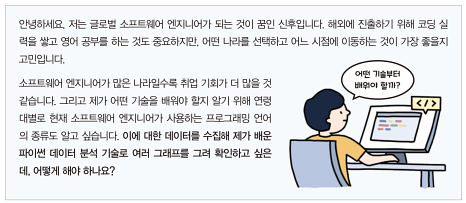

# 데이터 수집

- Google keyword : developer survey results
- stackoverflow site : https://survey.stackoverflow.co/2022/
- Download csv : https://insights.stackoverflow.com/survey


# 데이터 읽어 오기

In [4]:
import pandas as pd

raw_data = pd.read_csv('developerSurvey.csv')

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [5]:
raw_data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


# 데이터 정제 및 가공

## 데이터 필터링

- Age
- Country
- LanguageHaveWorkedWith : 다룰 줄 아는 프로그래밍 언어
- LearnCode : 프로그래밍을 배운 방법

In [6]:
# 필요한 열 추출

revised_data = raw_data[['Age', 'Country', 'LanguageHaveWorkedWith', 'LearnCode']]

revised_data.head()

,Age,Country,LanguageHaveWorkedWith,LearnCode
0,NaN,NaN,NaN,NaN
1,NaN,Canada,JavaScript;TypeScript,NaN
2,25-34 years old,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,Books / Physical media;Friend or family member...
3,35-44 years old,Israel,C#;JavaScript;SQL;TypeScript,"Books / Physical media;School (i.e., Universit..."
4,25-34 years old,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,"Other online resources (e.g., videos, blogs, f..."


## 특정 데이터 탐색

### 특정 열 데이터 조회

In [7]:
# 연령대 정보 확인

revised_data['Age']

0                    NaN
1                    NaN
2        25-34 years old
3        35-44 years old
4        25-34 years old
              ...       
73263    25-34 years old
73264    25-34 years old
73265    55-64 years old
73266    55-64 years old
73267    25-34 years old
Name: Age, Length: 73268, dtype: object

### 유일 데이터 확인

In [8]:

# 중복 값 제거 : drop_duplicates()  

revised_data['Age'].drop_duplicates()

0                     NaN
2         25-34 years old
3         35-44 years old
6      Under 18 years old
7         18-24 years old
9         45-54 years old
24        55-64 years old
77      65 years or older
451     Prefer not to say
Name: Age, dtype: object

## 데이터 그룹화

### 데이터 그룹화 객체 만들기

- Method : groupby()

In [9]:
# 연령대 데이터 그룹화

revised_data.groupby(['Age'])

## 데이터 그룹별 크기 구하기

### 연령대별 응답 숫자 확인

In [10]:
size_by_age = revised_data.groupby(['Age']).size()
size_by_age

Age
18-24 years old       16646
25-34 years old       28112
35-44 years old       13988
45-54 years old        5281
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Under 18 years old     3866
dtype: int64

### 국가별 응답 숫자 확인하기

In [11]:
size_by_country = revised_data.groupby(['Country']).size()
size_by_country

Country
Afghanistan                              69
Albania                                  59
Algeria                                  36
Andorra                                  15
Angola                                   12
                                       ... 
Venezuela, Bolivarian Republic of...    119
Viet Nam                                317
Yemen                                    14
Zambia                                   20
Zimbabwe                                 30
Length: 180, dtype: int64

# 데이터 시각화

## 연령대별 응답자 수 그래프그리기

### 선 그래프

<Axes: xlabel='Age'>

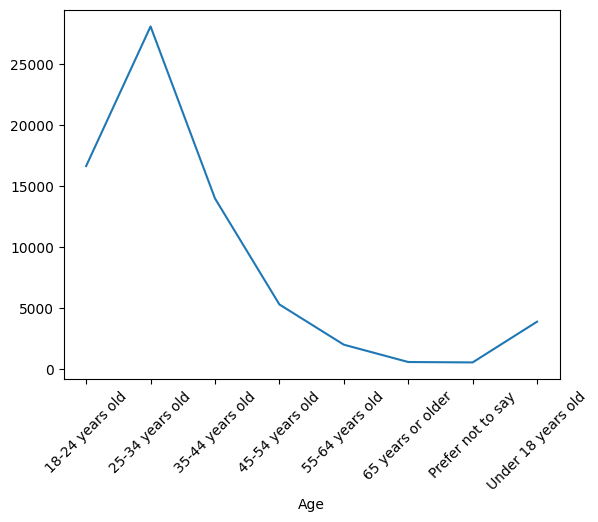

In [12]:
# 선 그래프

size_by_age.plot.line(rot=45)

### 수직 막대그래프

<Axes: xlabel='Age'>

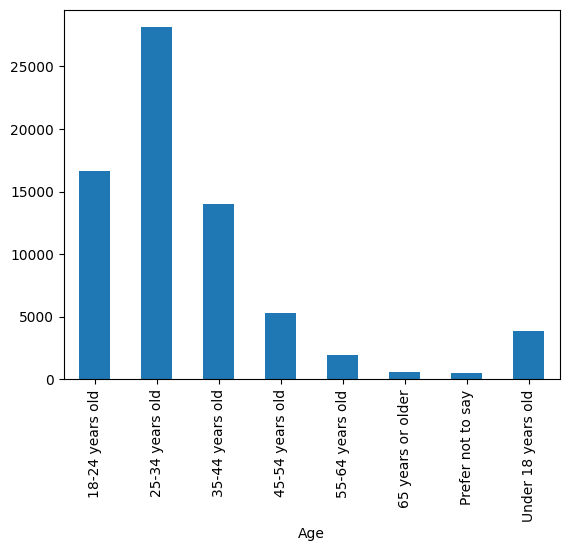

In [13]:
# 수직 막대그래프

size_by_age.plot.bar()

### 수평 막대그래프

<Axes: ylabel='Age'>

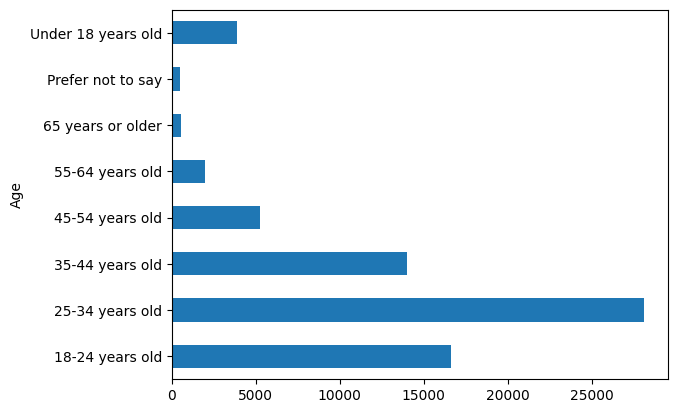

In [14]:
# 수평 막대그래프

size_by_age.plot.barh()

### 그룹이름(색인) 순서 변경

In [15]:
# 그룹이름(색인) 순서 변경

# 현재 색인 확인
size_by_age.index

Index(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Prefer not to say', 'Under 18 years old'],
      dtype='object', name='Age')

In [16]:
# 재 배치
reindex_size_by_age = size_by_age.reindex(index = [
    'Prefer not to say',
    '65 years or older',
    '55-64 years old',
    '45-54 years old',
    '35-44 years old',
    '25-34 years old',
    '18-24 years old',
    'Under 18 years old'
])

reindex_size_by_age

Age
Prefer not to say       521
65 years or older       554
55-64 years old        1978
45-54 years old        5281
35-44 years old       13988
25-34 years old       28112
18-24 years old       16646
Under 18 years old     3866
dtype: int64

<Axes: ylabel='Age'>

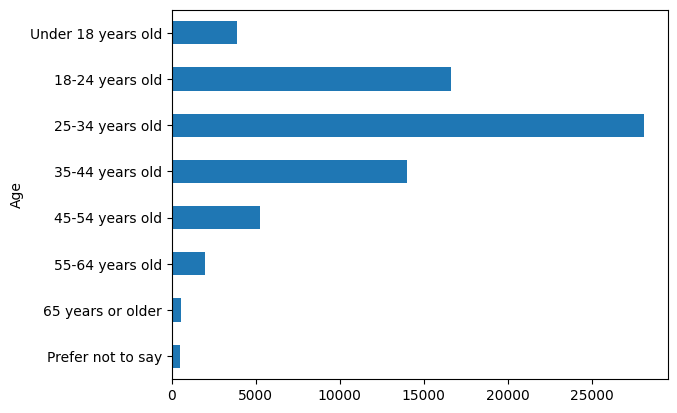

In [17]:
reindex_size_by_age.plot.barh()

## 국가별 응답자 수 그래프 그리기

### 기본 파이 그래프

<Axes: >

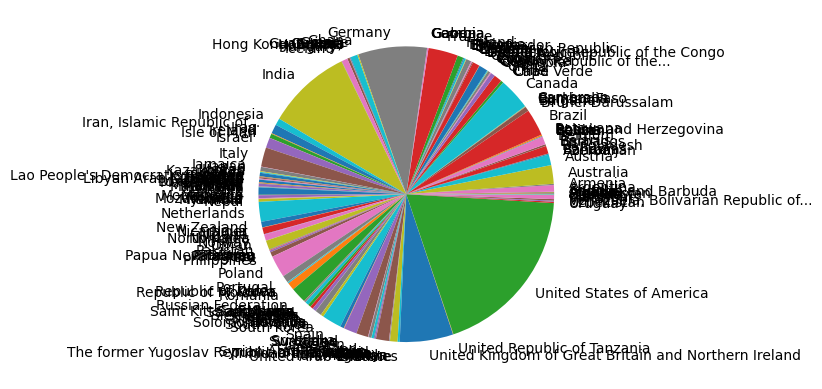

In [18]:
size_by_country.plot.pie()

### 그래프 크기 조정

<Axes: >

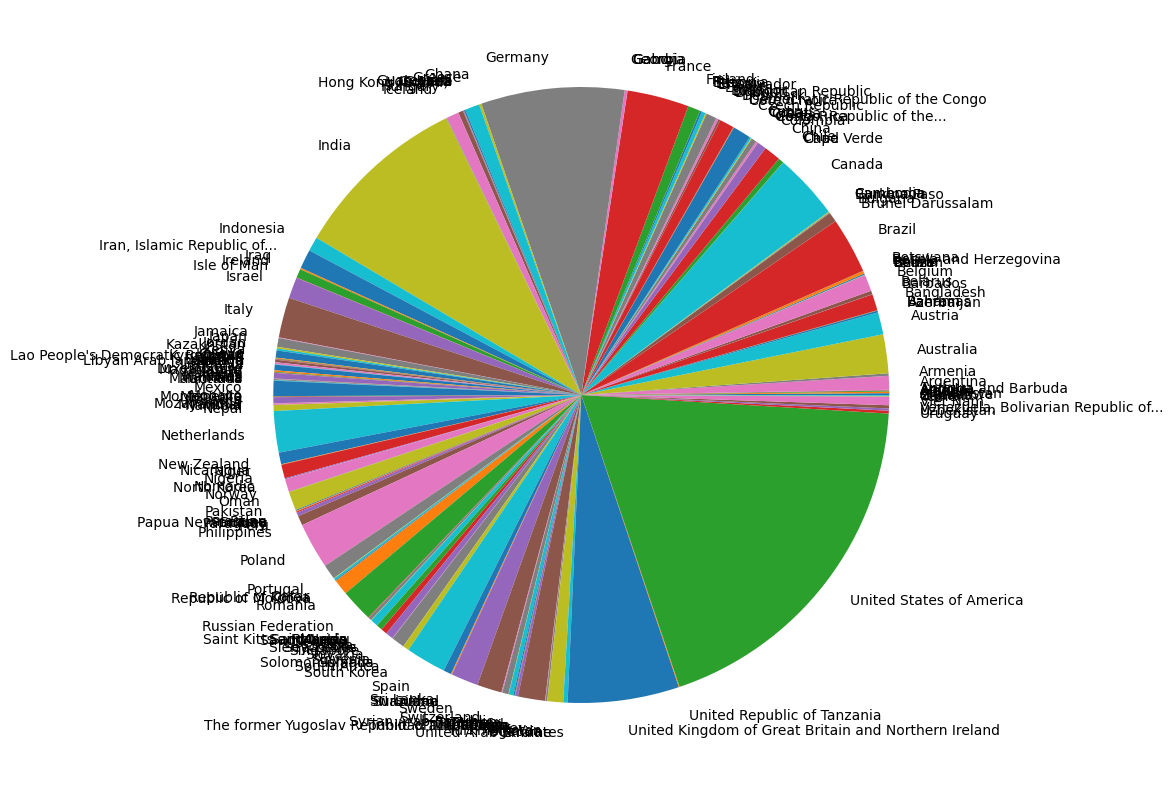

In [19]:
size_by_country.plot.pie(figsize=(10, 10))

### 상위 20개만 표현

- Method : nlargest()

In [20]:
size_by_country.nlargest(20)

Country
United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Sweden                                                   1020
Turkey                                                   1020
Switzerland                                               932


<Axes: >

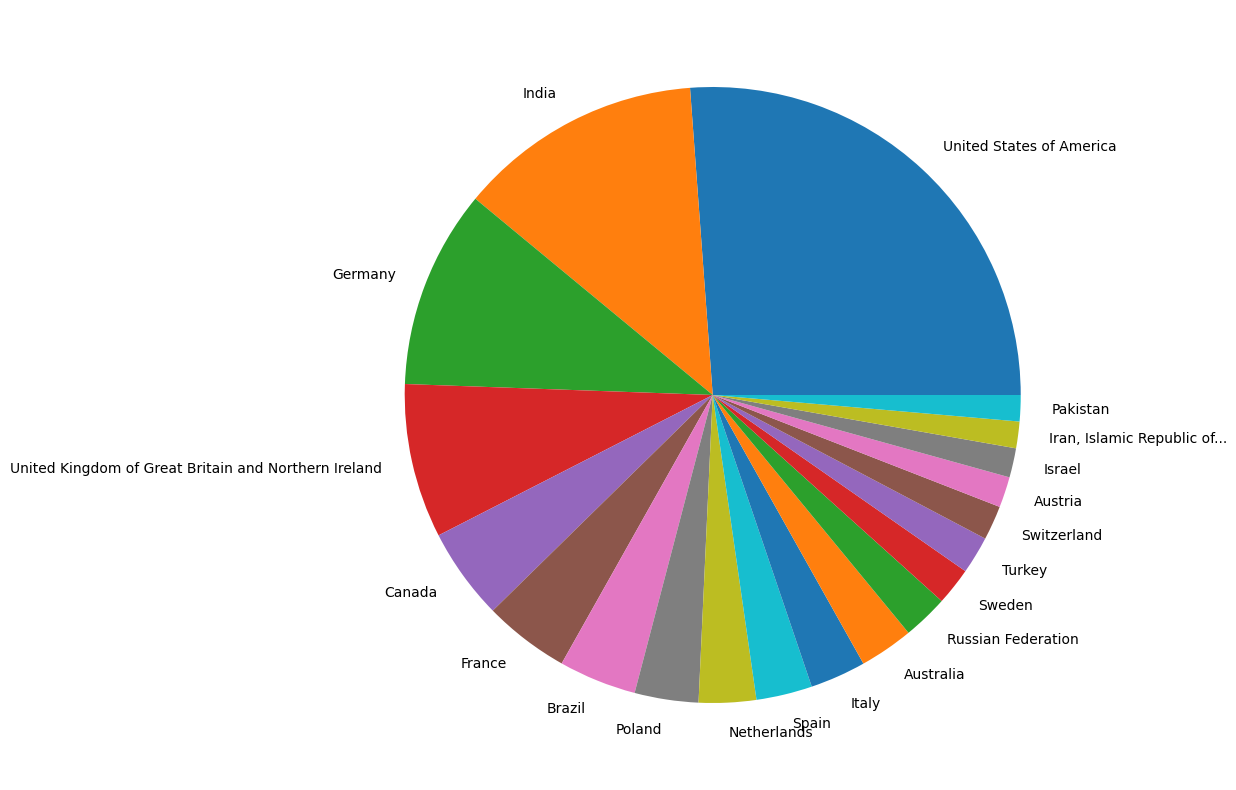

In [21]:
size_by_country.nlargest(20).plot.pie(figsize=(10, 10))

## 많이 사용되는 프로그래밍 언어 그래프 그리기

In [22]:
# 프로그래밍 언어 데이터 추출

languages = revised_data['LanguageHaveWorkedWith']

languages

0                                                      NaN
1                                    JavaScript;TypeScript
2                        C#;C++;HTML/CSS;JavaScript;Python
3                             C#;JavaScript;SQL;TypeScript
4              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73263    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73264            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73265                   HTML/CSS;JavaScript;PHP;Python;SQL
73266                                        C#;Delphi;VBA
73267          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

### ❤ **단일 객체를 리스트로 변환**

- Method : split()

In [23]:
# 데이터 문자열 변환 후 구분자(;)로 구분

languages = languages.str.split(';')

languages

0                                                      NaN
1                                 [JavaScript, TypeScript]
2                  [C#, C++, HTML/CSS, JavaScript, Python]
3                        [C#, JavaScript, SQL, TypeScript]
4        [C#, HTML/CSS, JavaScript, SQL, Swift, TypeScr...
                               ...                        
73263    [Bash/Shell, Dart, JavaScript, PHP, Python, SQ...
73264      [Bash/Shell, HTML/CSS, JavaScript, Python, SQL]
73265             [HTML/CSS, JavaScript, PHP, Python, SQL]
73266                                    [C#, Delphi, VBA]
73267    [C#, JavaScript, Lua, PowerShell, SQL, TypeScr...
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

### ❤ **리스트의 각 항목을 열로 나누기**

- Method : explode()

In [24]:
# 리스트 항목을 행으로 나누기
exploded_languages = languages.explode()

exploded_languages

0               NaN
1        JavaScript
1        TypeScript
2                C#
2               C++
            ...    
73267    JavaScript
73267           Lua
73267    PowerShell
73267           SQL
73267    TypeScript
Name: LanguageHaveWorkedWith, Length: 370114, dtype: object

### 프로그래밍별 응답 수 확인

In [25]:
# 프로그래밍별 응답 수 구하기
size_by_languages = exploded_languages.groupby(exploded_languages).size()

size_by_languages

LanguageHaveWorkedWith
APL              504
Assembly        3887
Bash/Shell     20656
C              13692
C#             19883
C++            16024
COBOL            464
Clojure         1070
Crystal          340
Dart            4648
Delphi          2311
Elixir          1528
Erlang           641
F#               730
Fortran          646
Go              7922
Groovy          2357
HTML/CSS       39142
Haskell         1577
Java           23644
JavaScript     46443
Julia           1084
Kotlin          6507
LISP             932
Lua             2867
MATLAB          2913
OCaml            422
Objective-C     1698
PHP            14827
Perl            1644
PowerShell      8575
Python         34155
R               3308
Ruby            4299
Rust            6625
SAS              435
SQL            35127
Scala           1837
Solidity        1031
Swift           3489
TypeScript     24752
VBA             3185
Name: LanguageHaveWorkedWith, dtype: int64

<Axes: ylabel='LanguageHaveWorkedWith'>

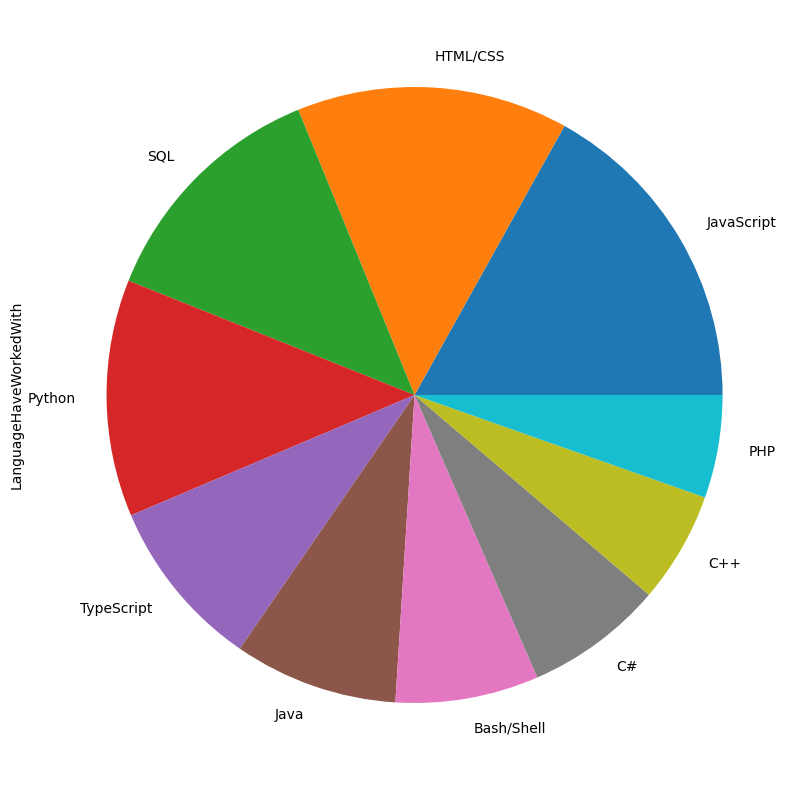

In [26]:
size_by_languages.nlargest(10).plot.pie(figsize = (10, 10))

### 백분율 표시

- autopct='%1.0f%%'
- Matplotlib.org : https://matplotlib.org/



<Axes: ylabel='LanguageHaveWorkedWith'>

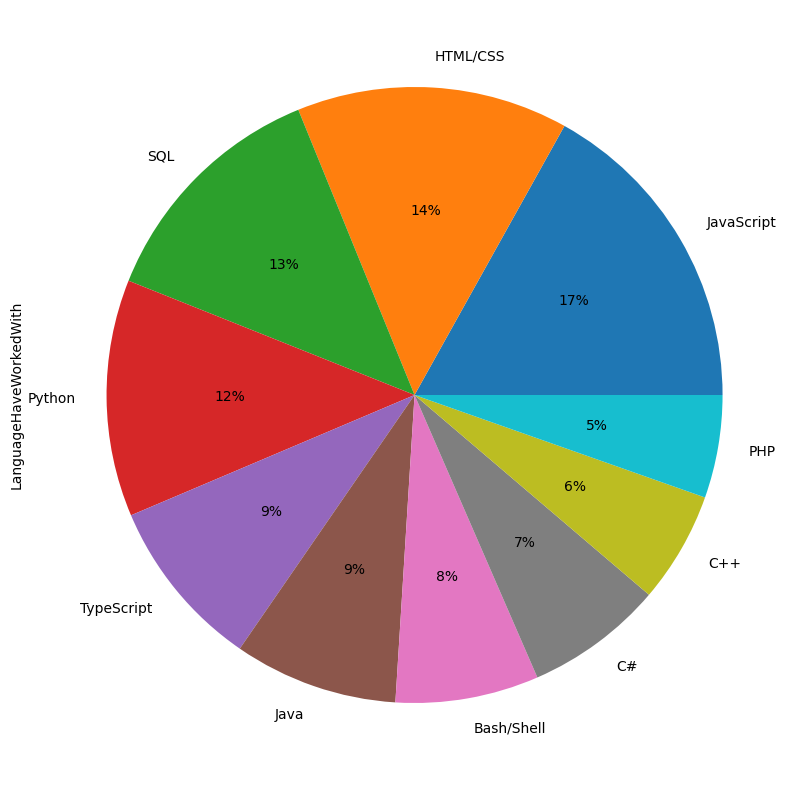

In [27]:
# 백분율 표시
size_by_languages.nlargest(10).plot.pie(figsize=(10, 10), autopct='%1.0f%%')

### 원하는 연령대 데이터만 추출해 그래프 그리기

In [28]:
# 25~34세 연령대가 사용한 프로그래밍 언어 정보 추출
languages_for_25_34 = revised_data[revised_data.Age == '25-34 years old']['LanguageHaveWorkedWith'].str.split(';').explode()

languages_for_25_34

2                C#
2               C++
2          HTML/CSS
2        JavaScript
2            Python
            ...    
73267    JavaScript
73267           Lua
73267    PowerShell
73267           SQL
73267    TypeScript
Name: LanguageHaveWorkedWith, Length: 137808, dtype: object

<Axes: ylabel='LanguageHaveWorkedWith'>

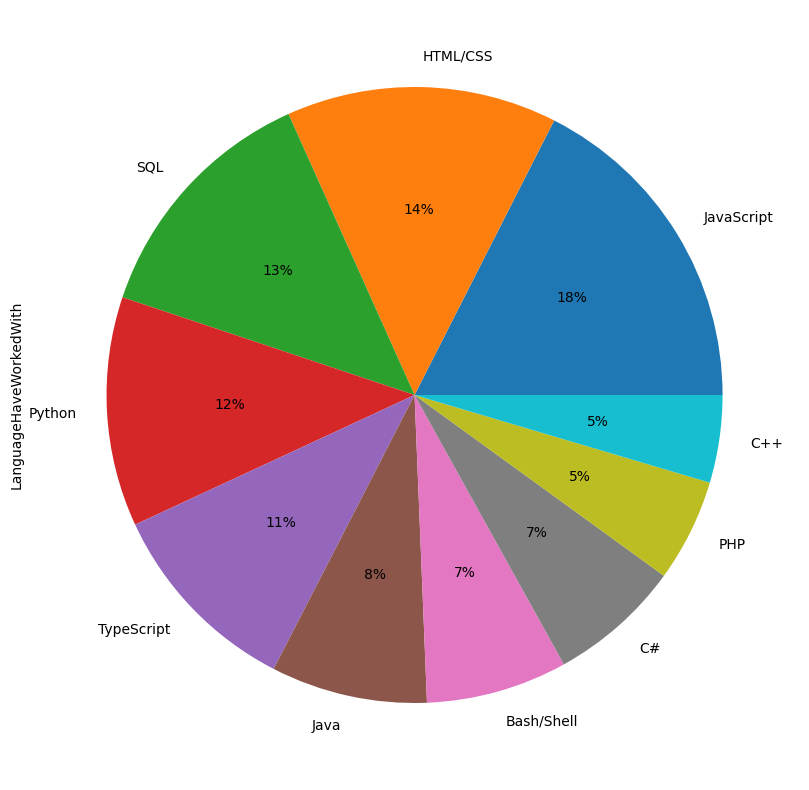

In [29]:
languages_for_25_34.groupby(languages_for_25_34).size().nlargest(10).plot.pie(figsize=(10, 10), autopct='%1.0f%%')

# 과제

1. revised_data 안에 추출한 데이터 중 행 이름이 LearnCode인 데이터를 활용해 백분율 표기한 파이 그래프 그리기

In [34]:
Learncode_date=revised_data.groupby(['LearnCode']).size()
Learncode_date

LearnCode
Books / Physical media                                                                                                               1120
Books / Physical media;Coding Bootcamp                                                                                                 59
Books / Physical media;Coding Bootcamp;Colleague                                                                                       18
Books / Physical media;Coding Bootcamp;Colleague;Hackathons (virtual or in-person)                                                      3
Books / Physical media;Coding Bootcamp;Colleague;Other (please specify):                                                                1
                                                                                                                                     ... 
School (i.e., University, College, etc);Online Courses or Certification;Hackathons (virtual or in-person)                              17
School (i.e., University

<Axes: >

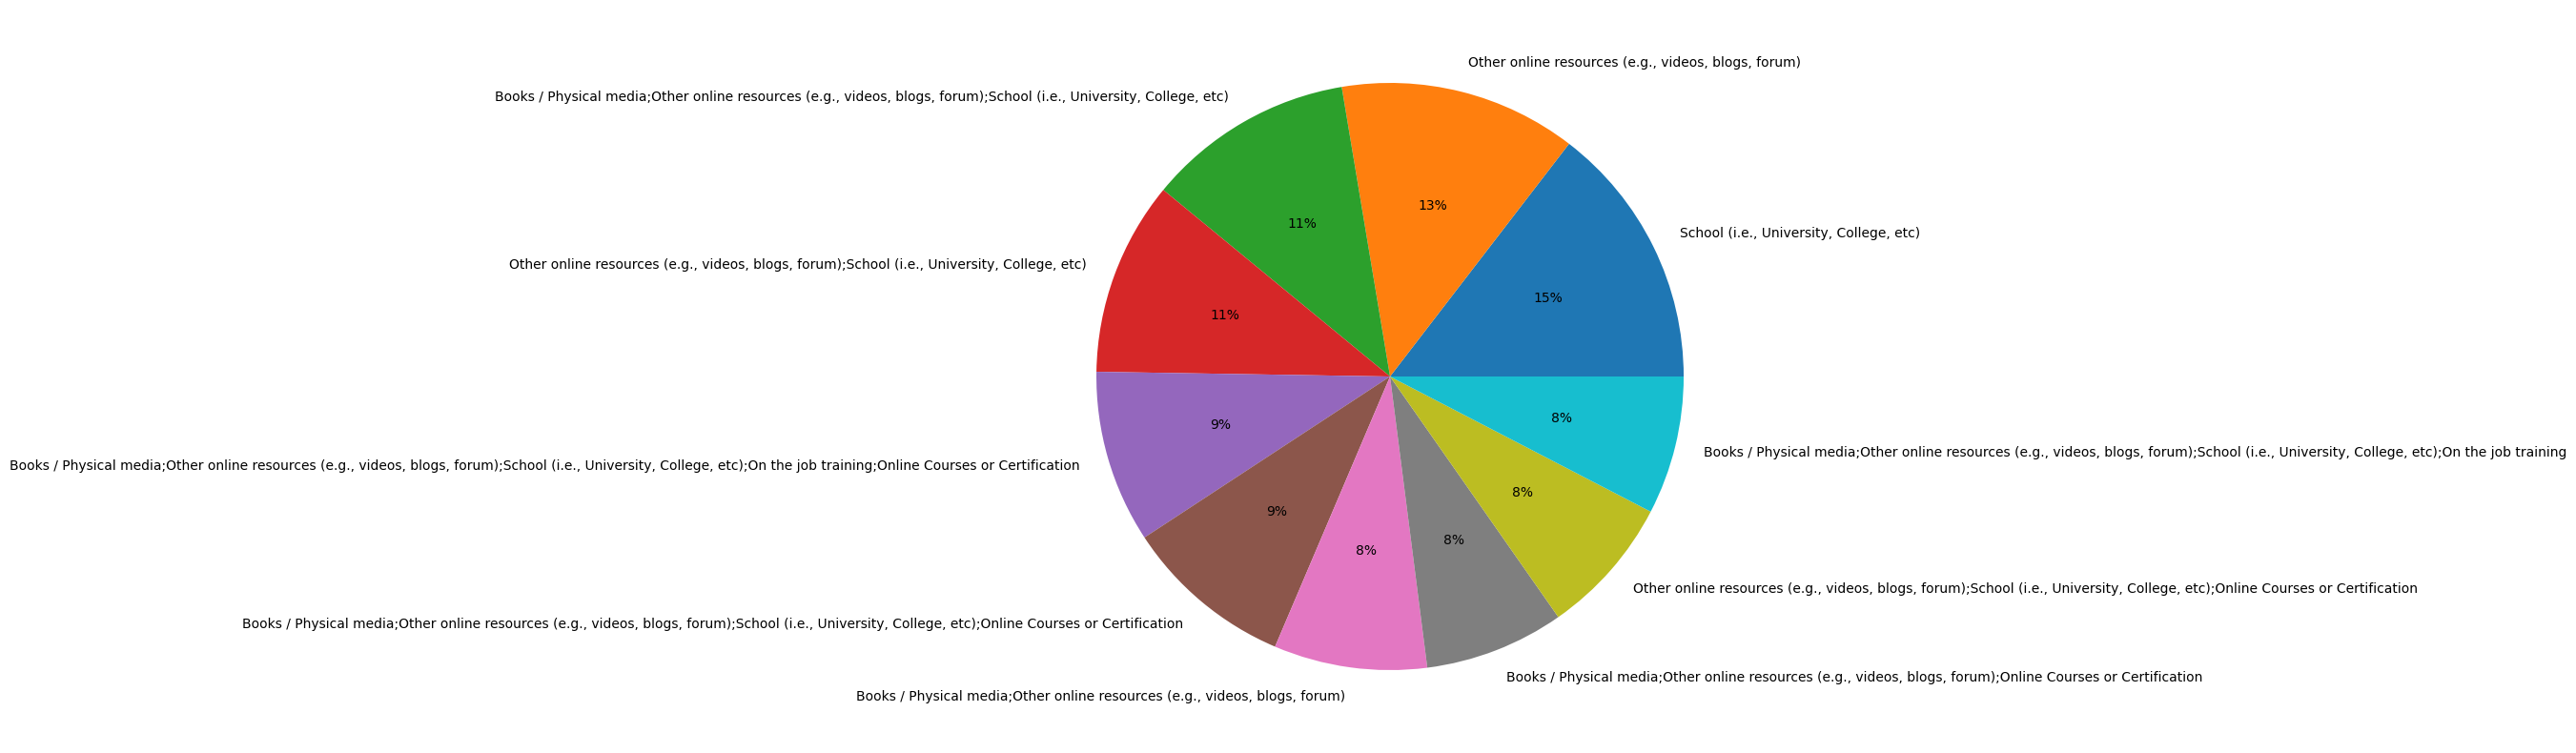

In [41]:
Learncode_date.nlargest(10).plot.pie(figsize=(10,10), autopct='%1.0f%%')

2. 1번에서 작성한 파이 그래프를 연령대가 25~34세인 응답자 대상으로 다시 그리고, 전체 데이터와 비교했을 때 해당 응답자들은 어떤 학습 방식을 선호하는지 확인해보기

In [44]:
learncode_for_25_34 = revised_data[revised_data.Age == '25-34 years old']['LearnCode'].str.split(';').explode()

learncode_for_25_34

2                                   Books / Physical media
2                                  Friend or family member
2        Other online resources (e.g., videos, blogs, f...
2                  School (i.e., University, College, etc)
4        Other online resources (e.g., videos, blogs, f...
                               ...                        
73267    Other online resources (e.g., videos, blogs, f...
73267              School (i.e., University, College, etc)
73267                                  On the job training
73267                      Online Courses or Certification
73267                    Hackathons (virtual or in-person)
Name: LearnCode, Length: 95440, dtype: object

<Axes: ylabel='LearnCode'>

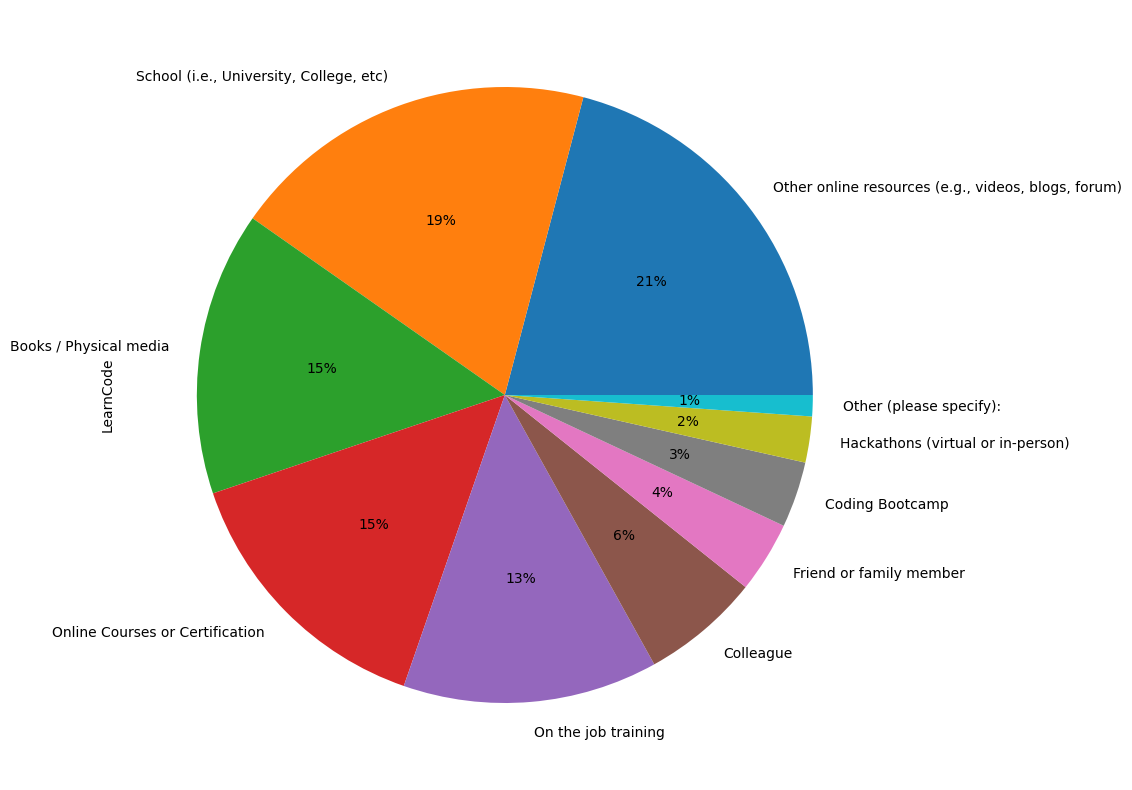

In [46]:
learncode_for_25_34.groupby(learncode_for_25_34).size().nlargest(10).plot.pie(figsize=(10,10), autopct='%1.0f%%')

Result: 전체 데이터에서는 모든 학습 방법에 대한 선호도가 비교적 고르게 분포되어 있는 반면, 25~34세 응답자들은 online source와 정규 교육 과정을 가장 선호하는 것을 알 수 있다.